## Airline Tweets Sentiment Analysis
### Stats & Machine Learning
### Fall 2021 
### Sasha Rider

In [1]:
#Importing main libraries 
import pandas as pd
import numpy as np

In [2]:
#Reading in airline tweets file 
df = pd.read_csv("Tweets.csv")

# EDA

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### Just from looking at the head of the dataframe, we can see that a negative sentiment confidence is equal to 1 and a positive is closer to 0. Neutral will contain reviews that are neither more negative nor positive. 

In [4]:
df.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [5]:
df['tweet_created'].unique()
#The tweets were collected from February 2015, 22nd and 24th. 

array(['2015-02-24 11:35:52 -0800', '2015-02-24 11:15:59 -0800',
       '2015-02-24 11:15:48 -0800', ..., '2015-02-22 11:59:15 -0800',
       '2015-02-22 11:59:02 -0800', '2015-02-22 11:58:51 -0800'],
      dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [7]:
df['negativereason_gold'].unique()
##These are all of the reasons for a negative review

array([nan, 'Late Flight\nFlight Attendant Complaints',
       'Late Flight\nLost Luggage', 'Late Flight',
       'Customer Service Issue', "Can't Tell",
       'Cancelled Flight\nCustomer Service Issue', 'Cancelled Flight',
       'Bad Flight', 'Lost Luggage\nDamaged Luggage',
       'Late Flight\nCancelled Flight', 'Flight Attendant Complaints',
       'Customer Service Issue\nLost Luggage',
       "Customer Service Issue\nCan't Tell"], dtype=object)

In [8]:
df['negativereason'].unique()

array([nan, 'Bad Flight', "Can't Tell", 'Late Flight',
       'Customer Service Issue', 'Flight Booking Problems',
       'Lost Luggage', 'Flight Attendant Complaints', 'Cancelled Flight',
       'Damaged Luggage', 'longlines'], dtype=object)

In [9]:
df['airline_sentiment_gold'].unique()
#We need to get rid of nan here as we should only have 3 classifications (positive, negative, and neutral)

array([nan, 'negative', 'neutral', 'positive'], dtype=object)

# Data Cleaning

In [10]:
#Getting the number of null values in each column 
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [11]:
#Data cleaning - replacing NA values with blank values
df['negativereason'] = df['negativereason'].fillna('')
df['negativereason_gold'] = df['negativereason_gold'].fillna('')

In [12]:
df['airline_sentiment_gold'] = df['airline_sentiment_gold'].fillna('')

In [13]:
#Now we have our 3 proper sentiments 
df['airline_sentiment_gold'].unique()

array(['', 'negative', 'neutral', 'positive'], dtype=object)

In [14]:
#Checking for null values, continuining the cleaning process
df.isnull().values.any()

True

In [15]:
#Looking at columns to see which ones are useful in analysis & which ones we can drop 
for col in df.columns:
    print(col)

tweet_id
airline_sentiment
airline_sentiment_confidence
negativereason
negativereason_confidence
airline
airline_sentiment_gold
name
negativereason_gold
retweet_count
text
tweet_coord
tweet_created
tweet_location
user_timezone


In [16]:
#Removing columns that are not useful, this will fix some of the null values 
waste = ['tweet_id', 'tweet_coord', 'tweet_location', 'name', 'retweet_count', 'user_timezone']

data = df.drop(waste, axis = 1)

In [17]:
#Checking to make sure columns are removed
for col in data.columns:
    print(col)

airline_sentiment
airline_sentiment_confidence
negativereason
negativereason_confidence
airline
airline_sentiment_gold
negativereason_gold
text
tweet_created


In [18]:
#Importing extra libraries that are needed for visualization 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

# Data Visualization

In [19]:
#Plotting histogram (Plotly) of the count of positive, neutral, and negative airline reviews.
Fig1 = px.histogram(df, x= "airline_sentiment")
Fig1.update_traces(marker_color = ["blue", "green", "red"], marker_line_color = 'rgb(8,4,8,107)', 
                  marker_line_width = 1.5)
Fig1.update_layout(title_text = "Sentiment Count")
Fig1.show()

### Here we see that a vast majority of these reviews are negative. So this is negatively imbalanced/ negatively biased. This is to be expected, as people who leave reviews about airlines are more than usual people that had a bad experience. There are more neutral reviews than positive, as we don't know how the reviews are being weighted, and a review that lacks/has both positive and negative aspects may be classified as neutral, seeing as most experiences aren't perfect.

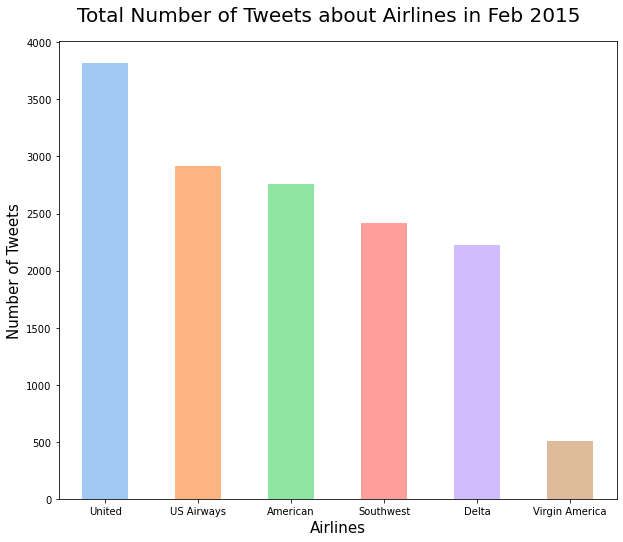

In [20]:
#Using seaborn library to plot total number of tweets for each airline
colors=sns.color_palette('pastel',10)
pd.Series(data['airline']).value_counts().plot(kind="bar",color=colors,figsize=(10,8),fontsize=10,rot=0)
plt.xlabel('Airlines',fontsize=15)
plt.ylabel('Number of Tweets',fontsize=15)
plt.suptitle('Total Number of Tweets about Airlines in Feb 2015', fontsize = 20)
plt.subplots_adjust(top=.92)

### From the above visualization we can see that United has the most reviews. This does not necessarily mean that they have the most negative reviews but that United is the largest airline, and had the most flights during the 2 day period that this data was collected. 

In [21]:
#Getting the count of negative reasons in the tweets
from termcolor import cprint
cprint('Reasons Of Negative Tweets :','red')
print(data.negativereason.value_counts())
#The biggest complaint is about customer service issues. Second biggest problem is late flights. 

Reasons Of Negative Tweets :
                               5462
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64


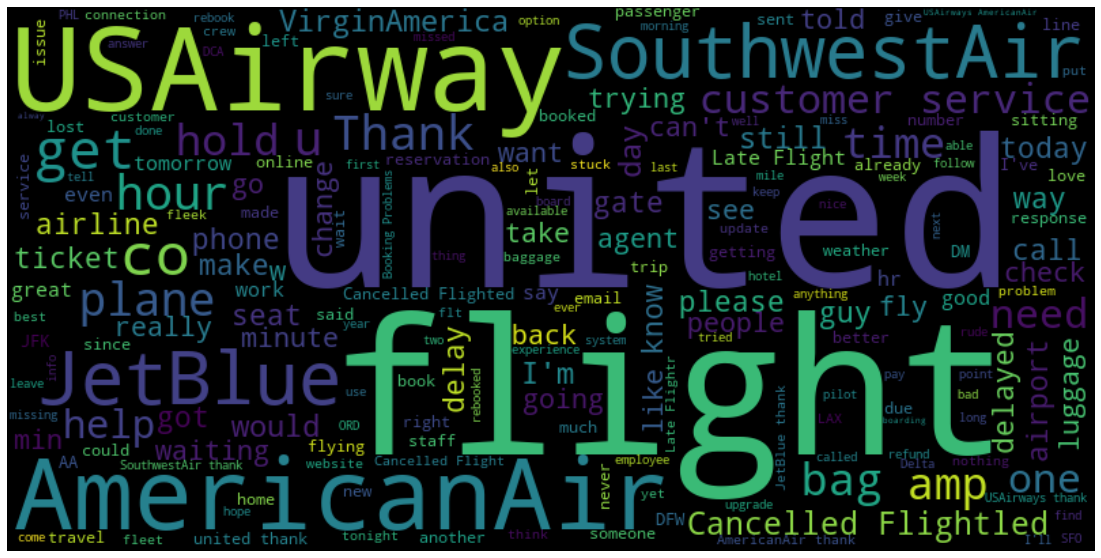

In [22]:
#Importing natural language toolkit library
#Generating a wordcloud
import nltk 
from nltk.corpus import stopwords
from wordcloud import WordCloud 

stopwords = nltk.corpus.stopwords.words('english')
#Create stopword list
stopwords = set(stopwords)
stopwords.update(["http"])
textt = " ".join(review for review in data.text)
wordcloud = WordCloud(stopwords = stopwords, width = 800, height = 400).generate(textt)

plt.figure(figsize = (20,10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.savefig("wordcloud1.png")
plt.show()
#Seeing as majority of the reviews are negative, it is safe to say that the worst airlines are United, UsAirway,
#SouthwestAir, AmericanAir, and JetBlue

## The words that stand out the most in the first wordcloud are flight, united, USAirway, AmericanAir, SouthwestAir, and Jetblue. So we want to add these to stop words so they don't show up in wordclouds as are they are not that meaningful. 

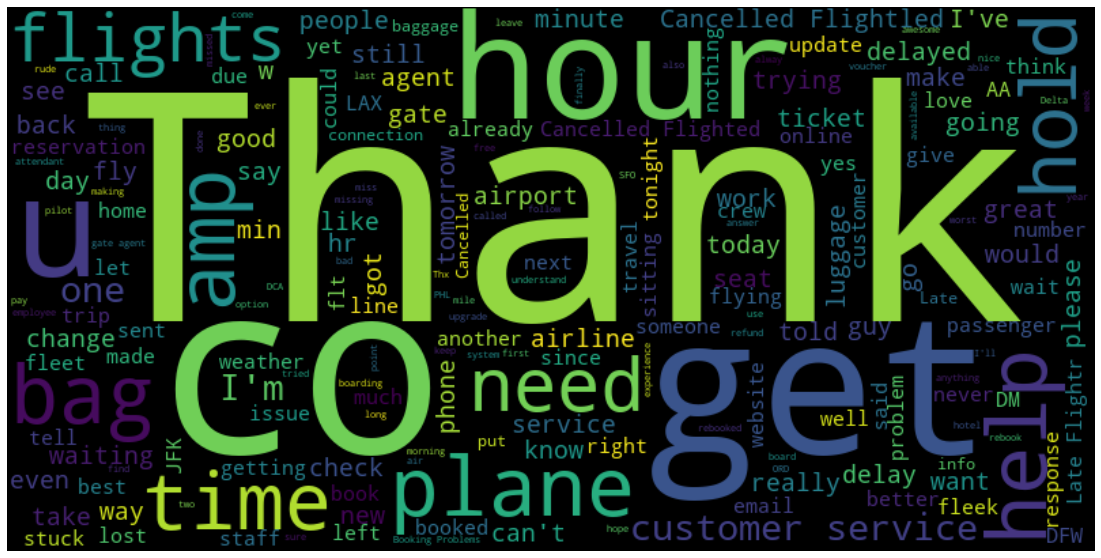

In [23]:
#Generating another wordcloud, this time without the main airline names to see most used words.
stopwords.update(["united", "AmericanAir", "USAirways", "SouthwestAir", "JetBlue", "VirginAmerica", "flight"])
textt = " ".join(review for review in data.text)
wordcloud2 = WordCloud(stopwords = stopwords, width = 800, height = 400).generate(textt)

plt.figure(figsize = (20,10))
plt.imshow(wordcloud2, interpolation = "bilinear")
plt.axis("off")
plt.savefig("wordcloud2.png")
plt.show()

## The words that stand out the most in the second word cloud are thank, plane, help, hour, hold, get, bag, need and time. So we are getting more meaningful words now.

In [24]:
#Seperating the positive, neutral and negative sentiments so that I can view them in seperate wordclouds. 
positive= data[data['airline_sentiment']=='positive'].text
neutral= data[data['airline_sentiment']=='neutral'].text
negative= data[data['airline_sentiment']=='negative'].text

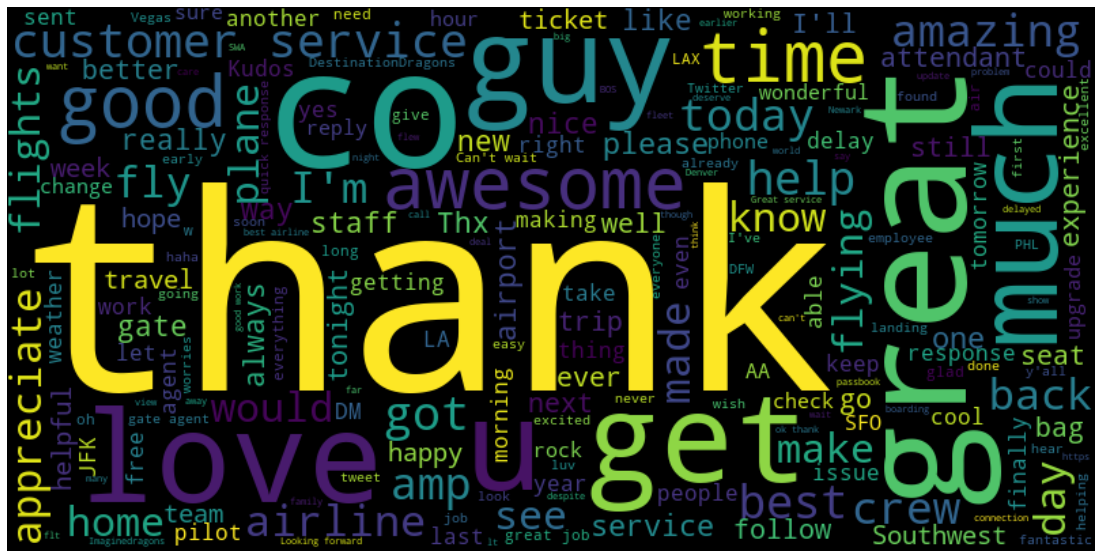

In [25]:
#Generating the positive wordcloud 
stopwords.update(["united", "AmericanAir", "USAirways", "SouthwestAir", "JetBlue", "VirginAmerica", "flight"])
textt = " ".join(review for review in data.text)
wordcloudPositive = WordCloud(stopwords = stopwords, width = 800, height = 400).generate("".join(positive))

plt.figure(figsize = (20,10))
plt.imshow(wordcloudPositive, interpolation = "bilinear")
plt.axis("off")
plt.savefig("PositiveWordCloud.png")
plt.show()

## The words that stand out the most here: love, awesome, time, great, thank, much, customer service, guy, and good. This wordcloud shows that people who had a nice easy airplane trip left a positive review, as to be expected.

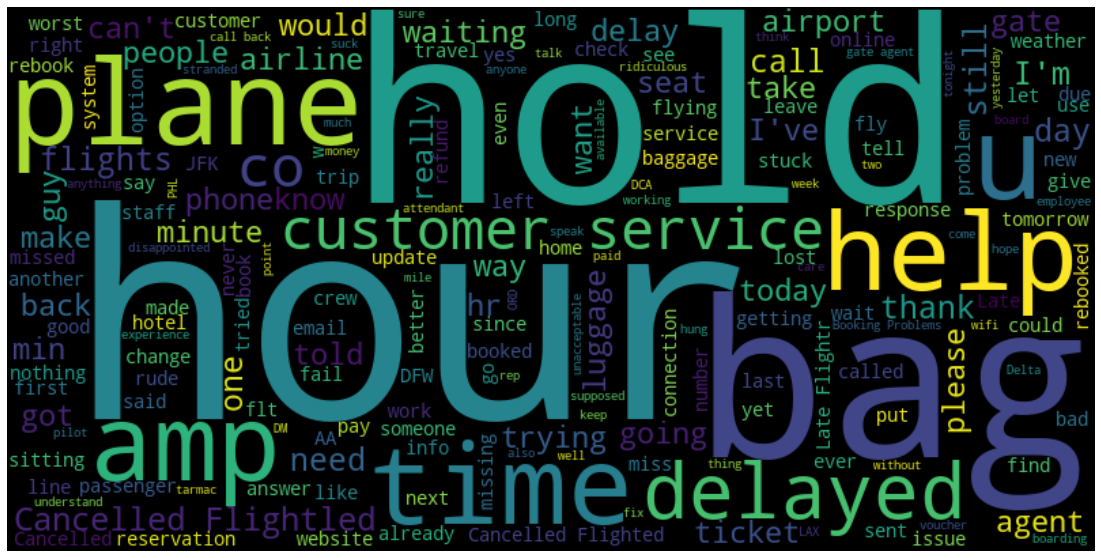

In [26]:
#Generating a negative wordcloud 
stopwords.update(["united", "AmericanAir", "USAirways", "SouthwestAir", "JetBlue", "VirginAmerica", "flight", "get"])
textt = " ".join(review for review in data.text)
wordcloudNegative = WordCloud(stopwords = stopwords, width = 800, height = 400).generate("".join(negative))

plt.figure(figsize = (20,10))
plt.imshow(wordcloudNegative, interpolation = "bilinear")
plt.axis("off")
plt.savefig("NegativeWordCloud.png")
plt.show()

## The words that stand out the most here: hour, hold, delayed, bag, cancelled flight, customer service, help, and time. Considering most people do not like having their time wasted, it seems that this is the biggest reason for a negative review. 

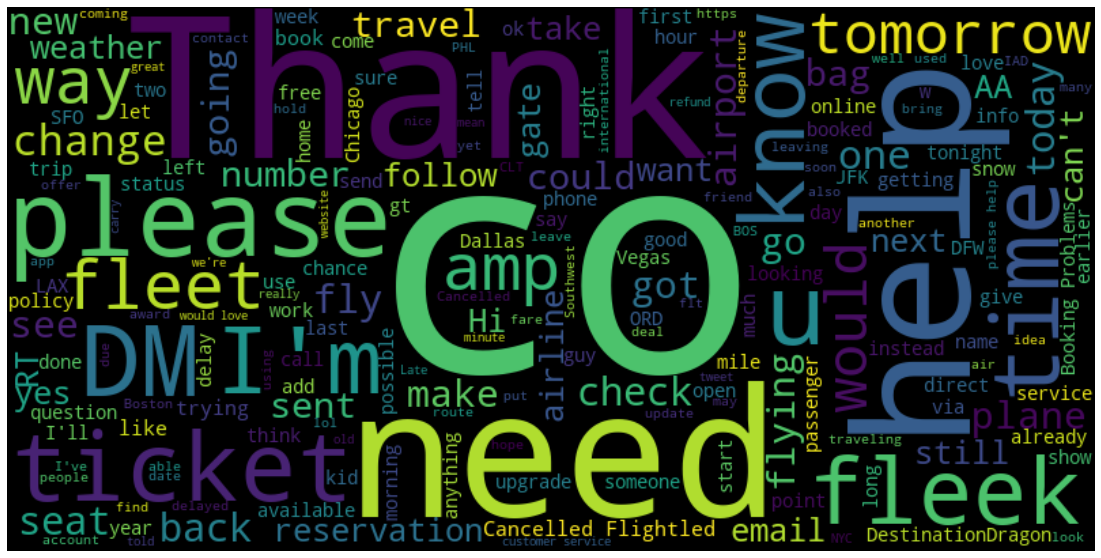

In [27]:
stopwords.update(["united", "AmericanAir", "USAirways", "SouthwestAir", "JetBlue", "VirginAmerica", "flight", 
                 "flights"])
textt = " ".join(review for review in data.text)
wordcloudNeutral = WordCloud(stopwords = stopwords, width = 800, height = 400).generate("".join(neutral))

plt.figure(figsize = (20,10))
plt.imshow(wordcloudNeutral, interpolation = "bilinear")
plt.axis("off")
plt.savefig("NeutralWordCloud.png")
plt.show()

## The words that stand out here are: help, please, thank, need, DM, ticket, time, and 2 words that are strange: fleek and fleet. These words are not particularly leaning towards negative or positive and thus why neutral reviews may have a higher count than positive ones. Fleek and fleet could either be slang or something to do with Twitter. 

# Text Preprocessing and Cleaning

In [28]:
#Now I am defining a method that is assigning sentiment values to have a numerical value. 
#Positive = 2, neutral = 1, and negative = 0 
def Sentiment_class(sentiment):
    if  sentiment == "positive":
        return 2
    elif sentiment == "neutral":
        return 1
    elif sentiment == "negative":
        return 0

In [29]:
#Applying this method on my airline sentiment column in data
data.airline_sentiment = data.airline_sentiment.apply(lambda x : Sentiment_class(x))

In [30]:
data.airline_sentiment

0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14640, dtype: int64

In [31]:
data

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,negativereason_gold,text,tweet_created
0,1,1.0000,,NaN,Virgin America,,,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800
1,2,0.3486,,0.0000,Virgin America,,,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800
2,1,0.6837,,NaN,Virgin America,,,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800
3,0,1.0000,Bad Flight,0.7033,Virgin America,,,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800
4,0,1.0000,Can't Tell,1.0000,Virgin America,,,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800
...,...,...,...,...,...,...,...,...,...
14635,2,0.3487,,0.0000,American,,,@AmericanAir thank you we got on a different f...,2015-02-22 12:01:01 -0800
14636,0,1.0000,Customer Service Issue,1.0000,American,,,@AmericanAir leaving over 20 minutes Late Flig...,2015-02-22 11:59:46 -0800
14637,1,1.0000,,NaN,American,,,@AmericanAir Please bring American Airlines to...,2015-02-22 11:59:15 -0800
14638,0,1.0000,Customer Service Issue,0.6659,American,,,"@AmericanAir you have my money, you change my ...",2015-02-22 11:59:02 -0800


In [67]:
#Cleaning the text so it can be vectorized 
from nltk.corpus import stopwords
import re
def text_cleaning(text):
    forbidden_words = set(stopwords.words('english'))
    if text:
        #split and join 
        text = ' '.join(text.split('.'))
        #removing special characters
        text = re.sub('\/',' ',text)
        text = re.sub(r'\\',' ',text)
        #remove http/https
        text = re.sub(r'((http)\S+)','',text)
        #remove username/airlines
        text = re.sub('@[^\s]+', '', text)
        #eliminating duplicate white spaces using wildcards, lower casing letters
        text = re.sub(r'\s+', ' ', re.sub('[^A-Za-z]', ' ', text.strip().lower())).strip()
        #eliminating special characters (such as !)
        text = re.sub(r'\W+', ' ', text.strip().lower()).strip()
        text = [word for word in text.split() if word not in forbidden_words]
        return text
    return []
    #removing html
    if html:
        html = re.compile(r'<.*?>')
        return html.sub(r'', text)

In [33]:
def cont_rep_char(text):
    tchr = text.group(0) 
    
    if len(tchr) > 1:
        return tchr[0:2] 

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute
def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

In [34]:
#applying defined methods above to text in data
fin_data = data['text'].apply(lambda x: ' '.join(text_cleaning(x)))

In [35]:
#Here we can see that our text is cleaner, we have removed things like @ usernames, abbreviations, and punctuation
fin_data.head(20)

0                                                  said
1               plus added commercials experience tacky
2                today must mean need take another trip
3     really aggressive blast obnoxious entertainmen...
4                                  really big bad thing
5     seriously would pay flight seats playing reall...
6         yes nearly every time fly vx ear worm go away
7     really missed prime opportunity men without ha...
8                                                  well
9                       amazing arrived hour early good
10    know suicide second leading cause death among ...
11    lt pretty graphics much better minimal iconogr...
12    great deal already thinking nd trip amp even g...
13    flying fabulous seductive skies u take stress ...
14                                               thanks
15                           sfo pdx schedule still mia
16    excited first cross country flight lax mco hea...
17    flew nyc sfo last week fully sit seat due 

In [36]:
#Defining fin_text as we had to define fin_data above, so "updating" it
fin_data['fin_text'] = data['text'].apply(lambda x: ' '.join(text_cleaning(x)))

In [37]:
fin_data['fin_text']

0                                                     said
1                  plus added commercials experience tacky
2                   today must mean need take another trip
3        really aggressive blast obnoxious entertainmen...
4                                     really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    leaving minutes late flight warnings communica...
14637            please bring american airlines blackberry
14638    money change flight answer phones suggestions ...
14639    ppl need know many seats next flight plz put u...
Name: text, Length: 14640, dtype: object

In [38]:
#applying other defined methods above unique_char, and char(x) to fin_text in fin_data 
fin_data['fin_text'] = fin_data['fin_text'].apply(lambda x : unique_char(cont_rep_char,x))
fin_data['fin_text'] = fin_data['fin_text'].apply(lambda x : char(x))

In [40]:
fin_data['fin_text']

0                                                     said
1                  plus added commercials experience tacky
2                   today must mean need take another trip
3        really aggressive blast obnoxious entertainmen...
4                                     really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    leaving minutes late flight warnings communica...
14637            please bring american airlines blackberry
14638    money change flight answer phones suggestions ...
14639    ppl need know many seats next flight plz put u...
Name: text, Length: 14640, dtype: object

In [41]:
#Adding a negative reason, if it is known, to the fin_text 
fin_data['fin_text'] = data['negativereason'].fillna('') + ' ' + fin_data['fin_text']

In [42]:
fin_data['fin_text']

0                                                     said
1                  plus added commercials experience tacky
2                   today must mean need take another trip
3        Bad Flight really aggressive blast obnoxious e...
4                          Can't Tell really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    Customer Service Issue leaving minutes late fl...
14637            please bring american airlines blackberry
14638    Customer Service Issue money change flight ans...
14639     ppl need know many seats next flight plz put ...
Length: 14640, dtype: object

In [43]:
#Checking for null values in the final data
fin_data.isnull().values.any()

False

In [45]:
X = fin_data['fin_text']

In [46]:
X

0                                                     said
1                  plus added commercials experience tacky
2                   today must mean need take another trip
3        Bad Flight really aggressive blast obnoxious e...
4                          Can't Tell really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    Customer Service Issue leaving minutes late fl...
14637            please bring american airlines blackberry
14638    Customer Service Issue money change flight ans...
14639     ppl need know many seats next flight plz put ...
Length: 14640, dtype: object

In [47]:
Y = data['airline_sentiment']

In [48]:
Y

0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14640, dtype: int64

# Vectorizing text

In [49]:
#Turning text into a matrix 
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
X_fin =  tfid.fit_transform(X)

In [50]:
X_fin

<14640x12661 sparse matrix of type '<class 'numpy.float64'>'
	with 143424 stored elements in Compressed Sparse Row format>

# Splitting train and test set

In [51]:
#80% Training & 20% Test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_fin, Y, test_size=0.2, random_state=0)

# Random Forest model

In [52]:
from sklearn.ensemble import RandomForestClassifier 
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,Y_train)

RandomForestClassifier()

In [53]:
random_forest_classifier.score(X_test, Y_test)
#Accuracy of 91%

0.9098360655737705

# Linear Regression model

In [54]:
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error

In [55]:
model = skl_lm.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [56]:
Y_train_pred = model.predict(X_train)
mean_squared_error(Y_train_pred,Y_train)
#Training error is 3%

0.03320979460084088

In [57]:
from sklearn.metrics import mean_squared_error
Y_test_pred = model.predict(X_test)
mean_squared_error(Y_test_pred,Y_test)
#Test error/Variance is 44.5

0.44485215552338075

In [58]:
#The training error is less than the test error because there is a sampling bias in the data. As mentioned before
#the data is negatively biased/skewed, so there are not enough positive reviews for the model to learn from. 
#To help smooth this imbalance out, we could apply something like SMOTE. 

# Logistic Regression with Confusion Matrix

In [59]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [60]:
lr.fit(X_train, Y_train)

LogisticRegression()

In [61]:
predictions = lr.predict(X_test)

In [62]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(Y_test)
confusion_matrix(predictions,Y_test)

array([[1868,   44,   26],
       [   2,  523,  125],
       [   0,   47,  293]])

In [63]:
print(classification_report(predictions,Y_test))
#The accuracy is about 92-93% using the logistic regression model 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1938
           1       0.85      0.80      0.83       650
           2       0.66      0.86      0.75       340

    accuracy                           0.92      2928
   macro avg       0.84      0.88      0.85      2928
weighted avg       0.93      0.92      0.92      2928

